<a href="https://colab.research.google.com/github/Pubudu-Piyankara/Euler/blob/main/lakTravel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

connect google drive with notebook

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# !pip install openpyxl

In [4]:
# !apt-get install git

In [5]:
# !git config --global user.name "Pubudu-Piyankara"
# !git config --global user.email "pubudupiyankara.me@gmail.com"

In [6]:
!git clone https://github.com/Pubudu-Piyankara/lakTravel_ML_Model.git


Cloning into 'lakTravel_ML_Model'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 1), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 130.90 KiB | 6.89 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [76]:
import pandas as pd
import numpy as np
from scipy import stats


In [8]:
import pandas as pd

# Replace 'path_to_your_file.csv' with the actual path to your CSV file
file_path = '/content/drive/MyDrive/Colab Notebooks/Source/all.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
df.head()


,Date,Temperature,Precipitation,Wind Speed
0,1/1/2019,24.2,0.0,2.3
1,2/1/2019,22.6,0.0,2.2
2,3/1/2019,23.3,0.0,3.1
3,4/1/2019,23.6,0.0,3.4
4,5/1/2019,23.2,0.0,3.7


In [9]:
df.dtypes

,0
Date,object
Temperature,float64
Precipitation,float64
Wind Speed,float64


In [10]:
df.shape

(1826, 4)

In [11]:
print(df.isnull().sum())

Date             0
Temperature      0
Precipitation    0
Wind Speed       0
dtype: int64


In [12]:
df.isna().sum()

,0
Date,0
Temperature,0
Precipitation,0
Wind Speed,0


In [13]:
df1= df.dropna()
df1.isna().sum()

,0
Date,0
Temperature,0
Precipitation,0
Wind Speed,0


In [14]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1821,False
1822,False
1823,False
1824,False


In [15]:
df.drop_duplicates()

,Date,Temperature,Precipitation,Wind Speed
0,1/1/2019,24.2,0.0,2.3
1,2/1/2019,22.6,0.0,2.2
2,3/1/2019,23.3,0.0,3.1
3,4/1/2019,23.6,0.0,3.4
4,5/1/2019,23.2,0.0,3.7
...,...,...,...,...
1821,27/12/2023,24.3,28.3,2.3
1822,28/12/2023,23.3,12.4,1.4
1823,29/12/2023,23.0,10.9,1.4
1824,30/12/2023,23.9,23.8,1.4


In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  # Convert to datetime

In [17]:
# these features help the model learn the relationship between time and weather, allowing it to make better predictions!
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['DayOfWeek'] = df['Date'].dt.dayofweek
df['IsWeekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 5 else 0)


In [18]:
df.head(10)

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend
0,2019-01-01,24.2,0.0,2.3,2019,1,1,1,0
1,2019-01-02,22.6,0.0,2.2,2019,1,2,2,0
2,2019-01-03,23.3,0.0,3.1,2019,1,3,3,0
3,2019-01-04,23.6,0.0,3.4,2019,1,4,4,0
4,2019-01-05,23.2,0.0,3.7,2019,1,5,5,1
5,2019-01-06,23.6,0.0,1.9,2019,1,6,6,1
6,2019-01-07,24.1,0.0,0.5,2019,1,7,0,0
7,2019-01-08,23.6,0.0,3.0,2019,1,8,1,0
8,2019-01-09,25.0,0.0,3.1,2019,1,9,2,0
9,2019-01-10,24.3,0.0,2.8,2019,1,10,3,0


# **Data Visuliazation**
outliers

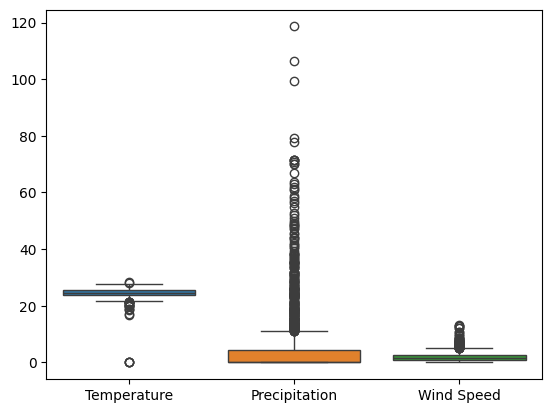

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=df[['Temperature', 'Precipitation', 'Wind Speed']])
plt.show()


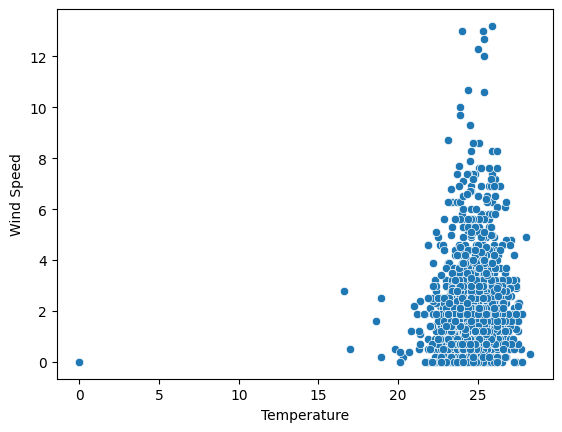

In [20]:
# Scatter plot
sns.scatterplot(x='Temperature', y='Wind Speed', data=df)
plt.show()

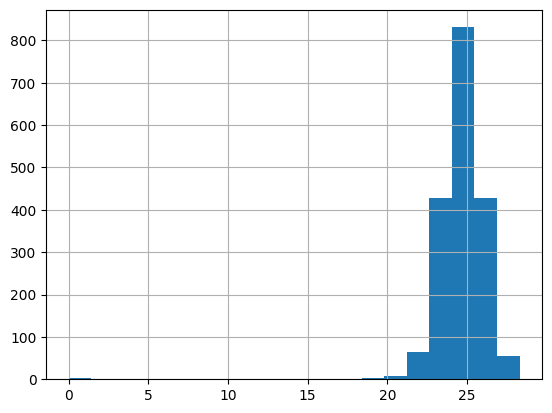

In [21]:
# Histrogram
df['Temperature'].hist(bins=20)
plt.show()

In [22]:
from scipy import stats
import numpy as np

# Calculate Z-scores for Temperature, Precipitation, and Wind Speed
z_scores = np.abs(stats.zscore(df[['Temperature', 'Precipitation', 'Wind Speed']]))

# Set a threshold (commonly 3) for identifying outliers
data_no_outliers = df[(z_scores < 3).all(axis=1)]


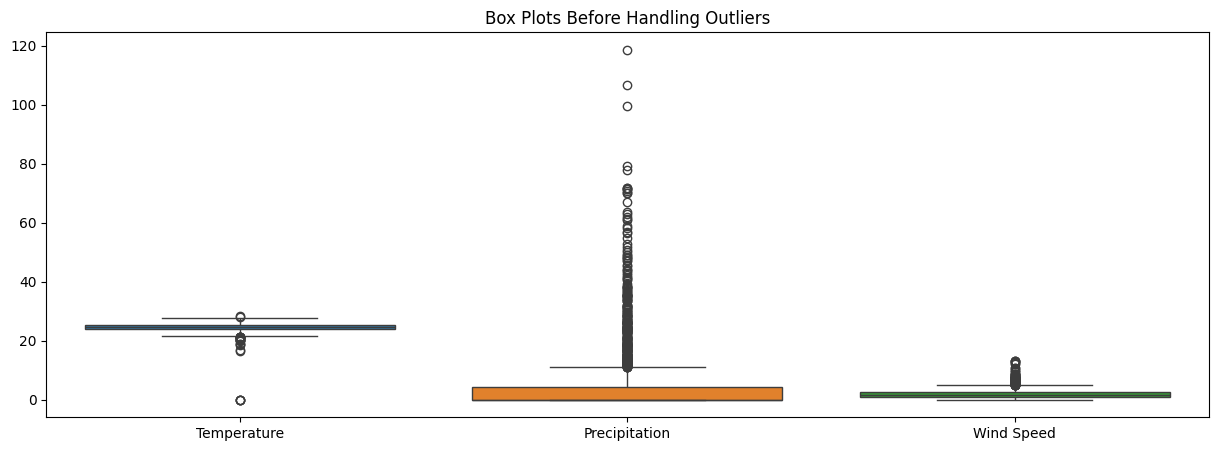

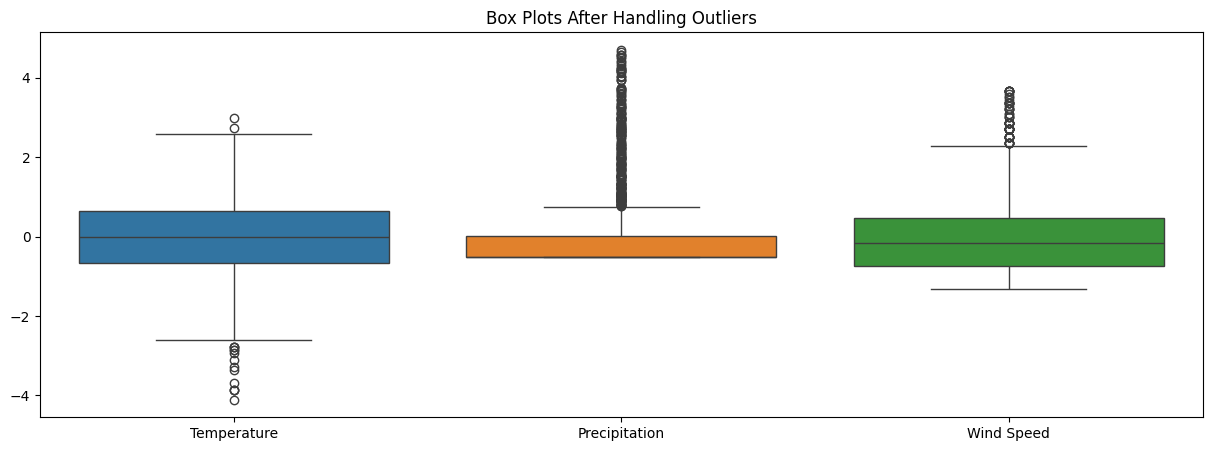

In [49]:
import seaborn as sns

# Plot box plots for original data
plt.figure(figsize=(15, 5))
sns.boxplot(data=df[['Temperature', 'Precipitation', 'Wind Speed']])
plt.title('Box Plots Before Handling Outliers')
plt.show()

# Plot box plots for data after handling outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=data_no_outliers[['Temperature', 'Precipitation', 'Wind Speed']])
plt.title('Box Plots After Handling Outliers')
plt.show()


In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


In [78]:
# Define thresholds
hot_threshold = 26
comfortable_min = 22
comfortable_max = 26
cool_threshold = 22
heavy_rainfall_threshold = 200
moderate_rainfall_min = 100
moderate_rainfall_max = 200
light_rainfall_threshold = 100
strong_winds_threshold = 15
moderate_winds_min = 8
moderate_winds_max = 15
light_winds_threshold = 8

In [79]:
# # Convert the Date column to datetime format if it's not already
# df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


In [80]:
# Function to categorize temperature
def temperature_category(temp):
    if temp > hot_threshold:
        return 'Hot'
    elif comfortable_min <= temp <= comfortable_max:
        return 'Comfortable'
    else:
        return 'Cool'

# Function to categorize precipitation
def rainfall_category(precip):
    if precip > heavy_rainfall_threshold:
        return 'Heavy'
    elif moderate_rainfall_min <= precip <= moderate_rainfall_max:
        return 'Moderate'
    else:
        return 'Light'

# Function to categorize wind speed
def wind_speed_category(wind):
    if wind > strong_winds_threshold:
        return 'Strong'
    elif moderate_winds_min <= wind <= moderate_winds_max:
        return 'Moderate'
    else:
        return 'Light'

# Apply categorical functions using .loc[]
data_no_outliers.loc[:, 'Temperature_Category'] = data_no_outliers['Temperature'].apply(temperature_category)
data_no_outliers.loc[:, 'Precipitation_Category'] = data_no_outliers['Precipitation'].apply(rainfall_category)
data_no_outliers.loc[:, 'Wind_Speed_Category'] = data_no_outliers['Wind Speed'].apply(wind_speed_category)

# Display the updated DataFrame with categorical labels
# print(data_no_outliers)
data_no_outliers.head()


,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Cool,...,Light,0,0,1,0,0,1,0,0,1


In [81]:
# def classify_temperature(temp):
#     if temp > 26:
#         return 'Hot'
#     elif 22 <= temp <= 26:
#         return 'Comfortable'
#     else:
#         return 'Cool'

# df['Temperature_Class'] = df['Temperature'].apply(classify_temperature)


In [82]:
# # First, group the data by month and calculate total rainfall
# df['Month'] = df['Date'].dt.month
# monthly_rainfall = df.groupby('Month')['Precipitation'].sum().reset_index()

# # Now classify the monthly rainfall
# def classify_rainfall(rain):
#     if rain > 200:
#         return 'Heavy Rainfall'
#     elif 100 <= rain <= 200:
#         return 'Moderate Rainfall'
#     else:
#         return 'Light Rainfall'

# monthly_rainfall['Rainfall_Class'] = monthly_rainfall['Precipitation'].apply(classify_rainfall)

# # Merge the classified rainfall back into the original dataset
# df = pd.merge(df, monthly_rainfall[['Month', 'Rainfall_Class']], on='Month', how='left')


In [83]:
# def classify_wind_speed(wind_speed):
#     if wind_speed > 15:
#         return 'Strong Winds'
#     elif 8 <= wind_speed <= 15:
#         return 'Moderate Winds'
#     else:
#         return 'Light Winds'

# df['Wind_Class'] = df['Wind Speed'].apply(classify_wind_speed)


In [84]:
# # Combine temperature, rainfall, and wind conditions into a single category
# df['Weather_Situation'] = df['Temperature_Class'] + '_' + df['Rainfall_Class'] + '_' + df['Wind_Class']


In [85]:
# # Features
# X = df[['Temperature', 'Precipitation', 'Wind Speed']]

# # Labels (Combined Weather Situation)
# y = df['Weather_Situation']


In [86]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train a Random Forest Classifier
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Make predictions
# y_pred = model.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy * 100:.2f}%")
# print(classification_report(y_test, y_pred))


In [87]:
# # Check temperature classification
# print(df[['Temperature', 'Temperature_Class']].head(10))

# # Check monthly rainfall classification
# print(monthly_rainfall[['Month', 'Precipitation', 'Rainfall_Class']])

# # Check wind speed classification
# print(df[['Wind Speed', 'Wind_Class']].head(10))


In [88]:
# print(df[['Temperature_Class', 'Rainfall_Class', 'Wind_Class', 'Weather_Situation']].head(10))


In [89]:
# # Check if the predictions match the actual values
# print("Actual vs Predicted")
# for actual, predicted in zip(y_test[:10], y_pred[:10]):
#     print(f"Actual: {actual}, Predicted: {predicted}")


In [90]:
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Cool,...,Light,0,0,1,0,0,1,0,0,1


In [91]:
print(data_no_outliers.isnull().sum())

Date                       0
Temperature                0
Precipitation              0
Wind Speed                 0
Year                       0
Month                      0
Day                        0
DayOfWeek                  0
IsWeekend                  0
Temperature_Category       0
Precipitation_Category     0
Wind_Speed_Category        0
Hot_Temperature            0
Comfortable_Temperature    0
Cool_Temperature           0
Heavy_Rainfall             0
Moderate_Rainfall          0
Light_Rainfall             0
Strong_Winds               0
Moderate_Winds             0
Light_Winds                0
dtype: int64


In [92]:
# # Step 1: Create a copy of the original unnormalized DataFrame
# data_copy = data_no_outliers.copy()

# # Extract month from the Date column
# data_copy['Month'] = data_copy['Date'].dt.month

# # Step 2: Group by Month and calculate the average values for Temperature, Precipitation, and Wind Speed
# monthly_data = data_copy.groupby('Month')[['Temperature', 'Precipitation', 'Wind Speed']].mean()

# # Step 3: Categorize temperature and precipitation based on thresholds
# # Apply categorization to the grouped monthly data
# monthly_data['Temperature_Category'] = monthly_data['Temperature'].apply(temperature_category)
# monthly_data['Precipitation_Category'] = monthly_data['Precipitation'].apply(rainfall_category)
# monthly_data['Wind_Speed_Category'] = monthly_data['Wind Speed'].apply(wind_speed_category)

# # Step 4: Display the categorized data
# print("Categorized Temperature, Precipitation, and Wind Speed by Month:")
# print(monthly_data[['Temperature_Category', 'Precipitation_Category', 'Wind_Speed_Category']])

# data_copy.head()

# **Z-score normalization (standardization)**




In [93]:
# Calculate Z-scores for Temperature, Precipitation, and Wind Speed
features = ['Temperature', 'Precipitation', 'Wind Speed']
data_no_outliers[features] = stats.zscore(data_no_outliers[features])


# Verify the normalization
print(data_no_outliers[features].describe())



        Temperature  Precipitation    Wind Speed
count  1.738000e+03    1738.000000  1.738000e+03
mean   3.270622e-17       0.000000  3.270622e-17
std    1.000288e+00       1.000288  1.000288e+00
min   -4.108723e+00      -0.500247 -1.328733e+00
25%   -6.620312e-01      -0.500247 -7.502595e-01
50%   -1.447089e-02      -0.500247 -1.717863e-01
75%    6.539785e-01       0.004463  4.789962e-01
max    2.993551e+00       4.706239  3.660599e+00


<ipython-input-93-48bff2b5debb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers[features] = stats.zscore(data_no_outliers[features])


In [94]:
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Cool,...,Light,0,0,1,0,0,1,0,0,1


In [95]:
import pandas as pd
import numpy as np

# Create binary and categorical labels using .loc[]
data_no_outliers.loc[:, 'Hot_Temperature'] = np.where(data_no_outliers['Temperature'] > hot_threshold, 1, 0)
data_no_outliers.loc[:, 'Comfortable_Temperature'] = np.where(
    (data_no_outliers['Temperature'] >= comfortable_min) &
    (data_no_outliers['Temperature'] <= comfortable_max), 1, 0)
data_no_outliers.loc[:, 'Cool_Temperature'] = np.where(data_no_outliers['Temperature'] < cool_threshold, 1, 0)

data_no_outliers.loc[:, 'Heavy_Rainfall'] = np.where(data_no_outliers['Precipitation'] > heavy_rainfall_threshold, 1, 0)
data_no_outliers.loc[:, 'Moderate_Rainfall'] = np.where(
    (data_no_outliers['Precipitation'] >= moderate_rainfall_min) &
    (data_no_outliers['Precipitation'] <= moderate_rainfall_max), 1, 0)
data_no_outliers.loc[:, 'Light_Rainfall'] = np.where(data_no_outliers['Precipitation'] < light_rainfall_threshold, 1, 0)

data_no_outliers.loc[:, 'Strong_Winds'] = np.where(data_no_outliers['Wind Speed'] > strong_winds_threshold, 1, 0)
data_no_outliers.loc[:, 'Moderate_Winds'] = np.where(
    (data_no_outliers['Wind Speed'] >= moderate_winds_min) &
    (data_no_outliers['Wind Speed'] <= moderate_winds_max), 1, 0)
data_no_outliers.loc[:, 'Light_Winds'] = np.where(data_no_outliers['Wind Speed'] < light_winds_threshold, 1, 0)

# Display the updated DataFrame with labels
# print(data_no_outliers)
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Cool,...,Light,0,0,1,0,0,1,0,0,1


In [96]:
data_no_outliers.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Cool,...,Light,0,0,1,0,0,1,0,0,1


In [97]:
# Extract month from the Date column
data_no_outliers.shape

(1738, 21)

In [98]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
data_copy = data_no_outliers.copy()

# Extract month from the Date column
data_copy['Month'] = data_copy['Date'].dt.month

# Filter for only numeric columns (like Temperature, Precipitation, Wind Speed)
numeric_columns = ['Temperature', 'Precipitation', 'Wind Speed']

# Group by Month and calculate average for the numeric columns
monthly_data = data_copy.groupby('Month')[numeric_columns].mean()

# Display the result
print(monthly_data)


       Temperature  Precipitation  Wind Speed
Month                                        
1        -0.768159      -0.257430    0.340201
2        -0.322309      -0.407474    0.250108
3         0.457217      -0.266573   -0.212839
4         0.779601       0.167784   -0.439579
5         0.788782       0.065737    0.007540
6         0.453557      -0.278046    0.254740
7         0.243901      -0.082293    0.438483
8         0.182815      -0.026067    0.425769
9        -0.319307       0.013440    0.110469
10       -0.421432       0.356766   -0.369466
11       -0.416844       0.481762   -0.555897
12       -0.737119       0.248113   -0.239698


In [99]:
data_copy.head()

,Date,Temperature,Precipitation,Wind Speed,Year,Month,Day,DayOfWeek,IsWeekend,Temperature_Category,...,Wind_Speed_Category,Hot_Temperature,Comfortable_Temperature,Cool_Temperature,Heavy_Rainfall,Moderate_Rainfall,Light_Rainfall,Strong_Winds,Moderate_Winds,Light_Winds
0,2019-01-01,-0.432252,-0.500247,0.334378,2019,1,1,1,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
1,2019-01-02,-1.769150,-0.500247,0.262069,2019,1,2,2,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
2,2019-01-03,-1.184257,-0.500247,0.912851,2019,1,3,3,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
3,2019-01-04,-0.933589,-0.500247,1.129779,2019,1,4,4,0,Cool,...,Light,0,0,1,0,0,1,0,0,1
4,2019-01-05,-1.267813,-0.500247,1.346706,2019,1,5,5,1,Cool,...,Light,0,0,1,0,0,1,0,0,1


In [100]:
# Assuming you stored the original means and standard deviations
mean_temperature = data_copy['Temperature'].mean()
std_temperature = data_copy['Temperature'].std()

mean_precipitation = data_copy['Precipitation'].mean()
std_precipitation = data_copy['Precipitation'].std()

# Reverse the Z-score normalization for Temperature and Precipitation
monthly_data['Original_Temperature'] = (monthly_data['Temperature'] * std_temperature) + mean_temperature
monthly_data['Original_Precipitation'] = (monthly_data['Precipitation'] * std_precipitation) + mean_precipitation

# Apply the existing categorization functions to the original values
monthly_data['Temperature_Category'] = monthly_data['Original_Temperature'].apply(temperature_category)
monthly_data['Precipitation_Category'] = monthly_data['Original_Precipitation'].apply(rainfall_category)

# Display the categorized data
print(monthly_data[['Temperature_Category', 'Precipitation_Category']])


      Temperature_Category Precipitation_Category
Month                                            
1                     Cool                  Light
2                     Cool                  Light
3                     Cool                  Light
4                     Cool                  Light
5                     Cool                  Light
6                     Cool                  Light
7                     Cool                  Light
8                     Cool                  Light
9                     Cool                  Light
10                    Cool                  Light
11                    Cool                  Light
12                    Cool                  Light


In [101]:
# Step 1: Display the original means and standard deviations to confirm their values
print(f"Mean Temperature: {mean_temperature}, Std Temperature: {std_temperature}")
print(f"Mean Precipitation: {mean_precipitation}, Std Precipitation: {std_precipitation}")

# Step 2: Check if Z-score reversal works correctly
monthly_data['Original_Temperature'] = (monthly_data['Temperature'] * std_temperature) + mean_temperature
monthly_data['Original_Precipitation'] = (monthly_data['Precipitation'] * std_precipitation) + mean_precipitation

# Display the first few rows to verify the original values
print("Original Temperature and Precipitation after Z-score reversal:")
print(monthly_data[['Original_Temperature', 'Original_Precipitation']].head())

# Step 3: Apply the existing categorization functions to the original values
monthly_data['Temperature_Category'] = monthly_data['Original_Temperature'].apply(temperature_category)
monthly_data['Precipitation_Category'] = monthly_data['Original_Precipitation'].apply(rainfall_category)

# Step 4: Display the categorized data
print("Categorized Temperature and Precipitation:")
print(monthly_data[['Temperature_Category', 'Precipitation_Category']].head())


Mean Temperature: 3.270622489114385e-17, Std Temperature: 1.000287811201815
Mean Precipitation: 0.0, Std Precipitation: 1.000287811201815
Original Temperature and Precipitation after Z-score reversal:
       Original_Temperature  Original_Precipitation
Month                                              
1                 -0.768380               -0.257504
2                 -0.322402               -0.407592
3                  0.457349               -0.266649
4                  0.779825                0.167832
5                  0.789009                0.065755
Categorized Temperature and Precipitation:
      Temperature_Category Precipitation_Category
Month                                            
1                     Cool                  Light
2                     Cool                  Light
3                     Cool                  Light
4                     Cool                  Light
5                     Cool                  Light
